In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('loan_approval_dataset.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.shape

(4269, 13)

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
col=df.columns
for i in col:
  if df[i].dtype=='object':
    print( i,df[i].nunique())


 education 2
 self_employed 2
 loan_status 2


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in col:
  if df[i].dtype=='object':
    df[i] = lb.fit_transform(df[i])
    print("done: ",i)

done:   education
done:   self_employed
done:   loan_status


In [ ]:
col

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
df.drop('loan_id',axis=1,inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
education,4269.0,4.977747e-01,5.000536e-01,0.0,0.0,0.0,1.0,1.0
self_employed,4269.0,5.036308e-01,5.000454e-01,0.0,0.0,1.0,1.0,1.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0


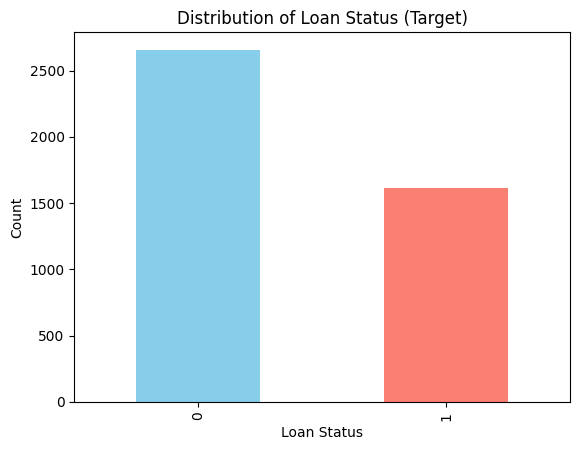

In [ ]:
df[' loan_status'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribution of Loan Status (Target)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [ ]:
corr =df.corr()

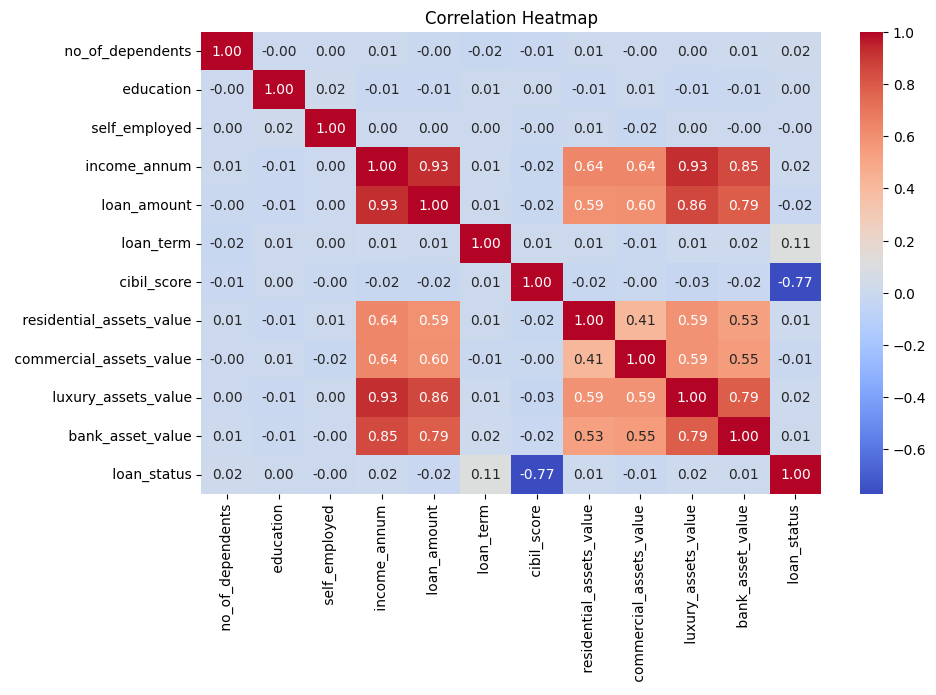

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


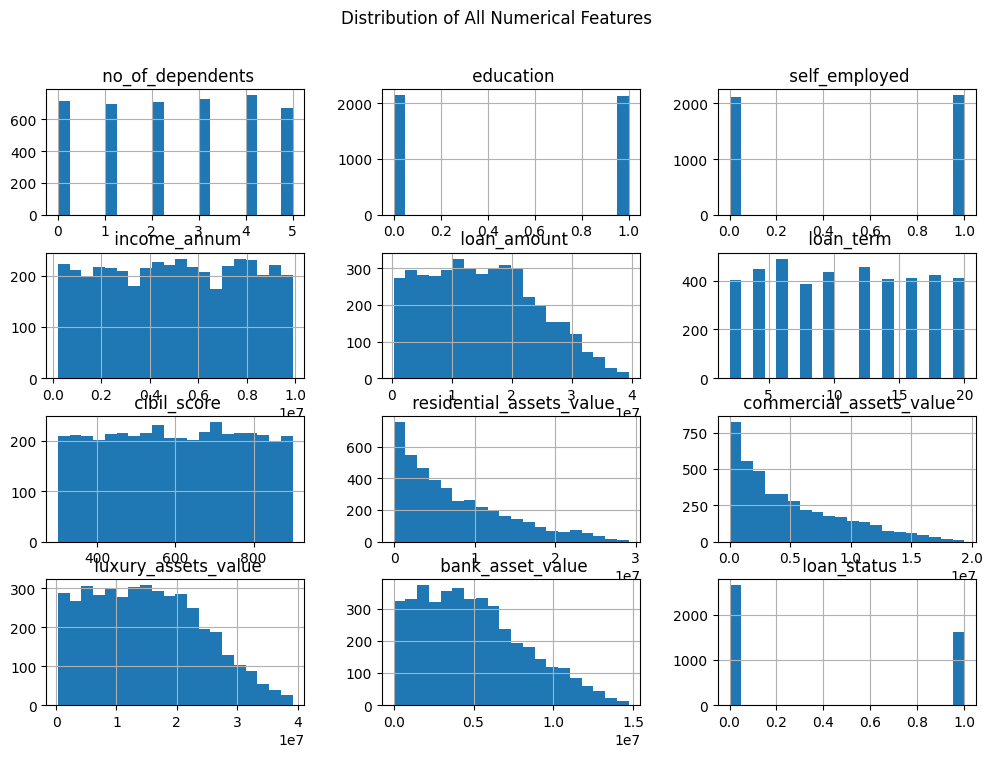

In [ ]:
df.hist(figsize=(12,8), bins=20)
plt.suptitle("Distribution of All Numerical Features")
plt.show()

In [ ]:
X=df.drop(' loan_status',axis=1)
y=df[' loan_status']

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

In [ ]:
X,y=sm.fit_resample(X,y)

In [ ]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

<Axes: xlabel=' loan_status'>

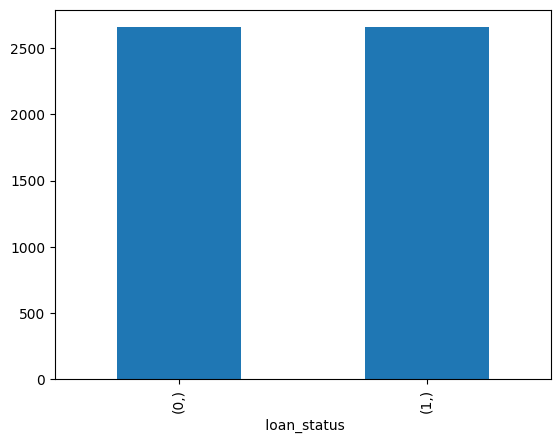

In [ ]:
y.value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
my_scaler = MinMaxScaler(feature_range=(0,1))
X_scaler_minMax = my_scaler.fit_transform(X)

In [ ]:
X_scaler_minMax.min(),X_scaler_minMax.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler_minMax,y,
                                   test_size= 0.20, random_state=42, stratify=y)

In [ ]:
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test  = ", y_test.shape)

X_train =  (4249, 11)  y_train =  (4249, 1)
X_test  =  (1063, 11)  y_test  =  (1063, 1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from tqdm import tqdm

In [ ]:
models={
    'LogisticRegression':LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(n_estimators= 30, criterion = 'log_loss',max_depth=10),
    "XGBClassifier":XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

In [ ]:
models_loss={}
for model_name , model in tqdm(models.items()):
    model.fit(X_train,y_train)
    y_pred_train=model.predict(X_train)
    y_pred_test=model.predict(X_test)
    models_loss[model_name]=[
        accuracy_score(y_train,y_pred_train),
        accuracy_score(y_test,y_pred_test),
        precision_score(y_train,y_pred_train,average="micro"),
        precision_score(y_test,y_pred_test,average="micro"),

        recall_score(y_train,y_pred_train,average="micro"),
        recall_score(y_test,y_pred_test,average="micro"),
        f1_score(y_train,y_pred_train,average="micro"),
        f1_score(y_test,y_pred_test,average="micro"),

    ]

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 50%|█████     | 2/4 [00:00<00:00, 13.37it/s]/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:07:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
100%|██████████| 4/4 [00:01<00:00,  3.83it/s]


In [ ]:
d=pd.DataFrame(models_loss).T

In [ ]:
d.columns = ['accuracy_score_train', 'accuracy_score_test', 'precision_score_train',"precision_score_test"
             ,"recall_score_train","recall_score_test","f1_score_train","f1_score_test"]

In [ ]:
d

,accuracy_score_train,accuracy_score_test,precision_score_train,precision_score_test,recall_score_train,recall_score_test,f1_score_train,f1_score_test
LogisticRegression,0.928454,0.945437,0.928454,0.945437,0.928454,0.945437,0.928454,0.945437
DecisionTreeClassifier,1.000000,0.982126,1.000000,0.982126,1.000000,0.982126,1.000000,0.982126
RandomForestClassifier,0.998353,0.984008,0.998353,0.984008,0.998353,0.984008,0.998353,0.984008
XGBClassifier,1.000000,0.990593,1.000000,0.990593,1.000000,0.990593,1.000000,0.990593
